<a href="https://githubtocolab.com/giswqs/geemap/blob/master/examples/notebooks/11_export_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) if needed.

In [ ]:
# !pip install geemap

In [74]:
import ee
import geemap
import os

In [75]:
geemap.show_youtube('_6JOA-iiEGU')

Output(layout=Layout(width='815px'))

In [76]:
geemap.set_proxy(port=10809)
Map = geemap.Map(center=[-99.2222, 46.7816],zoom=4)
Map

Map(center=[-99.2222, 46.7816], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(châ€¦

## Download an ee.Image

In [77]:
image = ee.Image('LANDSAT/LE7_TOA_5YEAR/1999_2003')

landsat_vis = {'bands': ['B4', 'B3', 'B2'], 'gamma': 1.4}
Map.addLayer(image, landsat_vis, "LE7_TOA_5YEAR/1999_2003", True, 0.7)

In [78]:
# Draw any shapes on the map using the Drawing tools before executing this code block
feature = Map.draw_last_feature

if feature is None:
    geom = ee.Geometry.Polygon(
        [
            [
                [-115.413031, 35.889467],
                [-115.413031, 36.543157],
                [-114.034328, 36.543157],
                [-114.034328, 35.889467],
                [-115.413031, 35.889467],
            ]
        ]
    )
    feature = ee.Feature(geom, {})

roi = feature.geometry()

In [48]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')
filename = os.path.join(out_dir, 'landsat.tif')

### Exporting all bands as one single image

In [52]:
image = image.clip(roi).unmask()
geemap.ee_export_image(
    image, filename=filename, scale=90, region=roi, file_per_band=False
)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\SAR\Downloads\landsat.tif


### Exporting each band as one image

In [53]:
geemap.ee_export_image(
    image, filename=filename, scale=90, region=roi, file_per_band=True
)

Generating URL ...
Please wait ...
Data downloaded to C:\Users\SAR\Downloads


### Export an image to Google Drive

In [54]:
geemap.ee_export_image_to_drive(
    image, description='landsat', folder='export', region=roi, scale=30
)

## Download an ee.ImageCollection

In [68]:
import ee
import geemap
import os

In [69]:
loc = ee.Geometry.Point(-99.2222, 46.7816)
collection = (
    ee.ImageCollection('USDA/NAIP/DOQQ')
    .filterBounds(loc)
    .filterDate('2008-01-01', '2020-01-01')
    .filter(ee.Filter.listContains("system:band_names", "N"))
)

In [71]:
hyperion_vis = {
    'min': 1000.0,
    'max': 14000.0,
    'gamma': 2.5,
}

In [72]:
Map.addLayer(collection, hyperion_vis, 'USDA/NAIP/DOQQ');

In [57]:
out_dir = os.path.join(os.path.expanduser('~'), 'Downloads')

In [58]:
print(collection.aggregate_array('system:index').getInfo())

['m_4609915_sw_14_060_20180902_20181213', 'm_4609915_sw_14_060_20190626', 'm_4609915_sw_14_1_20090818', 'm_4609915_sw_14_1_20100629', 'm_4609915_sw_14_1_20120714', 'm_4609915_sw_14_1_20140901', 'm_4609915_sw_14_1_20150926', 'm_4609915_sw_14_h_20160704', 'm_4609915_sw_14_h_20170703']


In [59]:
geemap.ee_export_image_collection(collection, out_dir=out_dir)

Total number of images: 9

Exporting 1/9: m_4609915_sw_14_060_20180902_20181213.tif
Generating URL ...
An error occurred while downloading.
Pixel grid dimensions (8499x12100) must be less than or equal to 10000.


Exporting 2/9: m_4609915_sw_14_060_20190626.tif
Generating URL ...
An error occurred while downloading.
Pixel grid dimensions (8659x12259) must be less than or equal to 10000.


Exporting 3/9: m_4609915_sw_14_1_20090818.tif
Generating URL ...
An error occurred while downloading.
Total request size (342797672 bytes) must be less than or equal to 50331648 bytes.


Exporting 4/9: m_4609915_sw_14_1_20100629.tif
Generating URL ...
An error occurred while downloading.
Total request size (330117216 bytes) must be less than or equal to 50331648 bytes.


Exporting 5/9: m_4609915_sw_14_1_20120714.tif
Generating URL ...
An error occurred while downloading.
Total request size (330117216 bytes) must be less than or equal to 50331648 bytes.


Exporting 6/9: m_4609915_sw_14_1_20140901.tif
G

In [60]:
geemap.ee_export_image_collection_to_drive(collection, folder='export', scale=10)

Total number of images: 9



## Extract pixels as a Numpy array

In [84]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select(['B4', 'B5', 'B6'])

aoi = ee.Geometry.Polygon(
    [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
)

rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

Image.sampleRectangle: Too many pixels in sample; must be <= 262144. Got 1040554.


AttributeError: 'NoneType' object has no attribute 'shape'

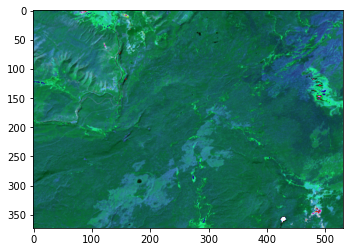

In [82]:
# Scale the data to [0, 255] to show as an RGB image.
# Adapted from https://bit.ly/2XlmQY8. Credits to Justin Braaten
rgb_img_test = (255 * ((rgb_img[:, :, 0:3] - 100) / 3500)).astype('uint8')
plt.imshow(rgb_img_test)
plt.show()